ASSIGNMENT TWO: POKEMON DATASET



BISIMBEKO REMMY


Access Number - B26099

Reg. No. - J24M19/011

In [138]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import joblib
import pickle
from scipy.stats import chi2_contingency, f_oneway
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [139]:
# Ignore warnings
import warnings  
warnings.filterwarnings("ignore")

# Explore all aspects of the dataset

In [140]:
# Load the dataset
df = pd.read_csv('Pokemon.csv')

In [141]:
# Display basic information
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [142]:
# Display the first few rows: Approach 1
print("First few rows of the dataset:\n", df.head())

First few rows of the dataset:
    #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [143]:
# Display the first few rows: Approach 2
print("\nSample Data:")
print(df.head())


Sample Data:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [144]:
# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (800, 13)


In [145]:
# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 #              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [146]:
# Display summary of descriptive statistics 
print("\nSummary statistics:\n", df.describe())


Summary statistics:
                 #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.0

In [147]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 #               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


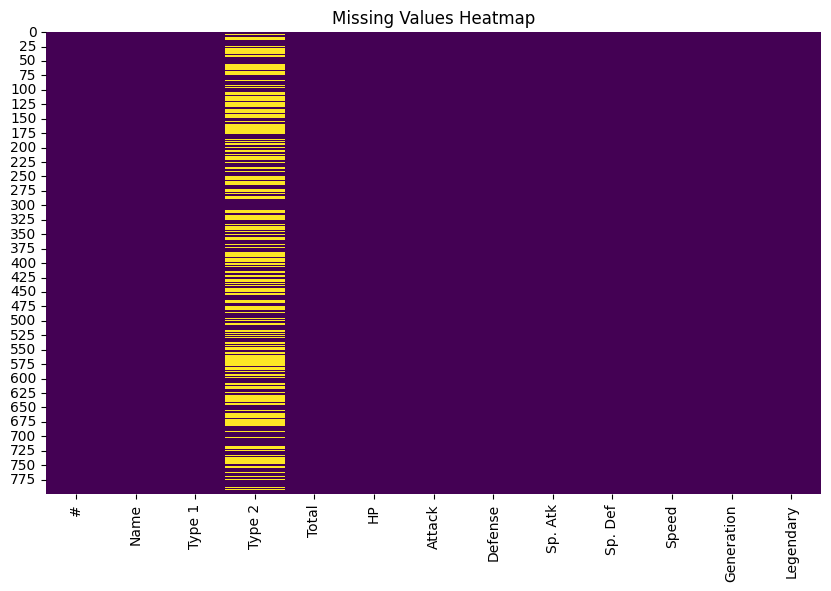

In [148]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

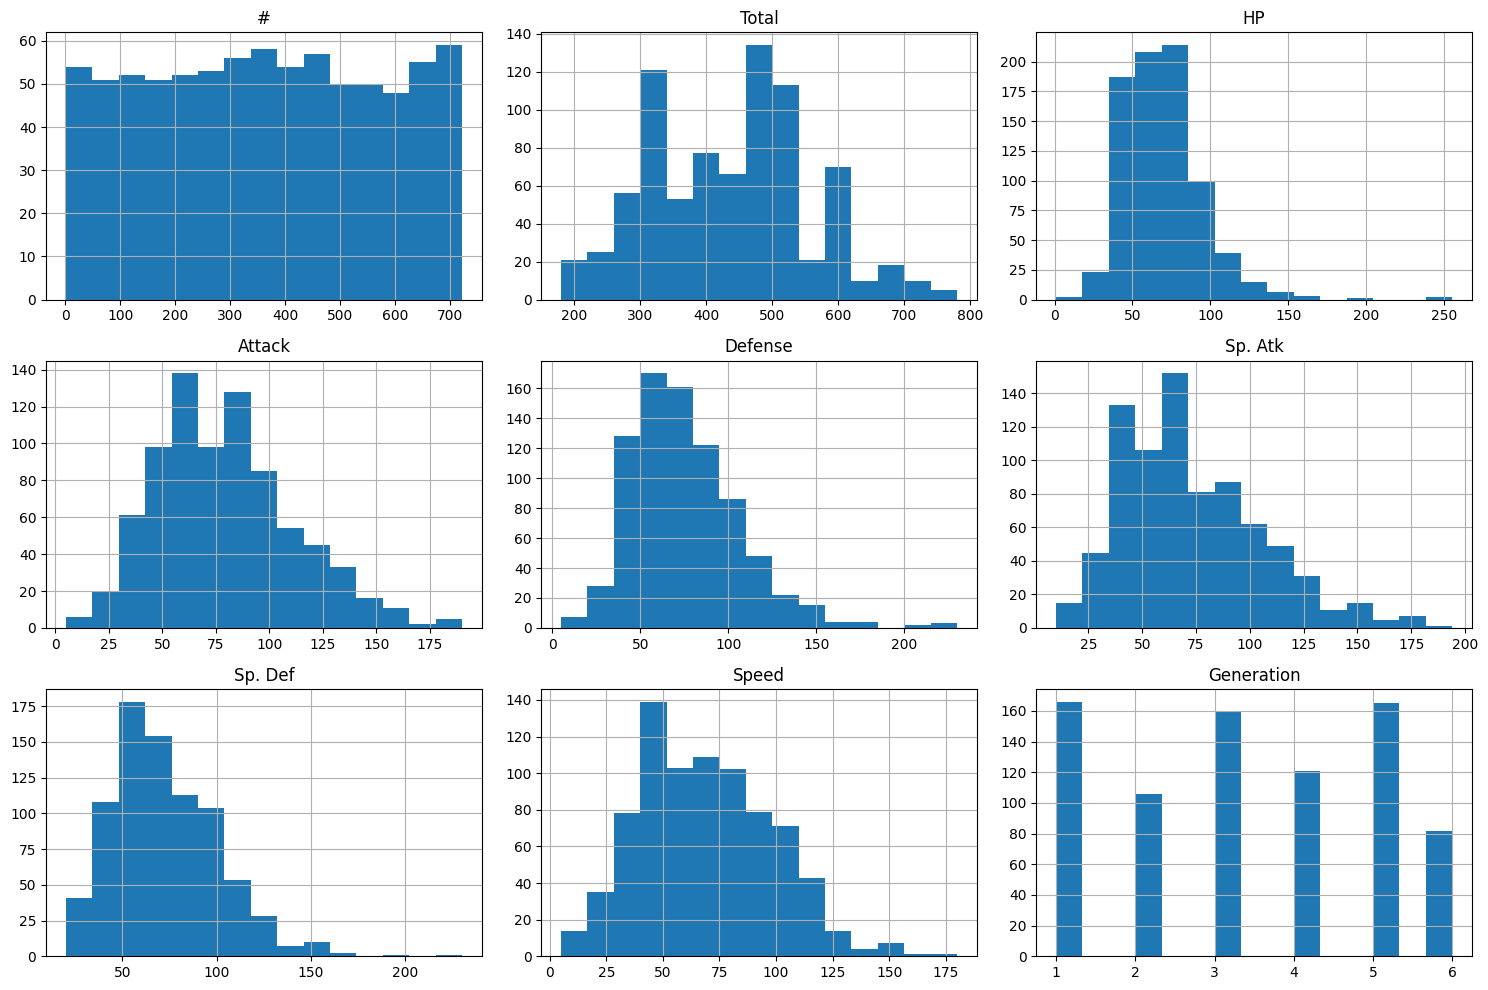

In [149]:
# Visualize the distribution of each numeric feature
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [150]:
# Fill missing values in 'Type 2' with 'None'
df['Type 2'].fillna('None', inplace=True)

In [151]:
# Check for unique values in categorical columns
print("\nUnique values in 'Type 1':\n", df['Type 1'].unique())
print("\nUnique values in 'Type 2':\n", df['Type 2'].unique())
print("\nUnique values in 'Generation':\n", df['Generation'].unique())
print("\nUnique values in 'Legendary':\n", df['Legendary'].unique())


Unique values in 'Type 1':
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

Unique values in 'Type 2':
 ['Poison' 'None' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']

Unique values in 'Generation':
 [1 2 3 4 5 6]

Unique values in 'Legendary':
 [False  True]


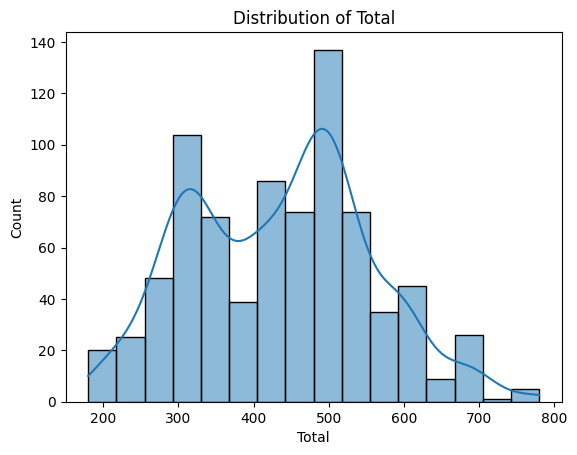

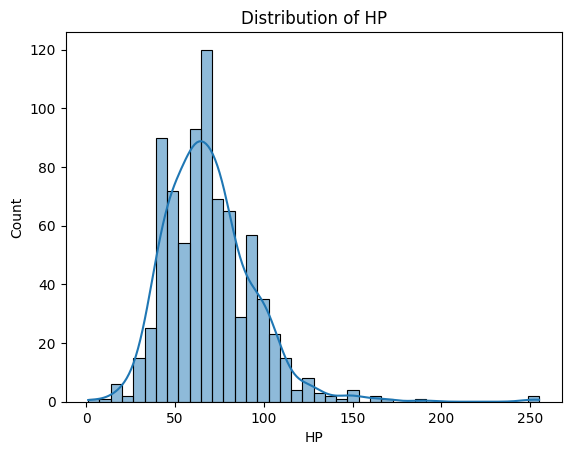

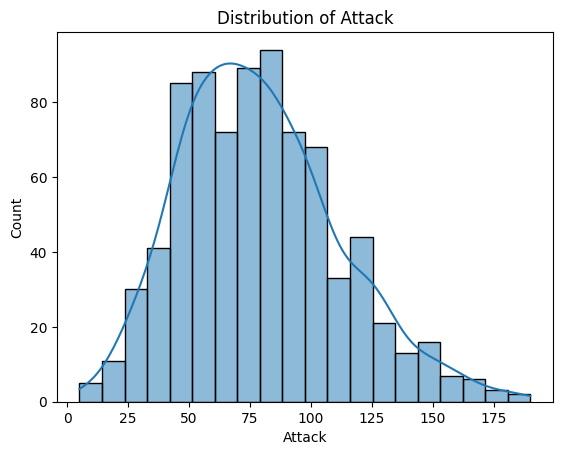

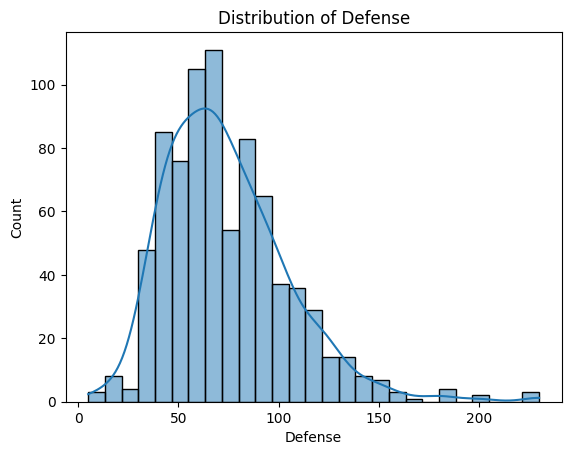

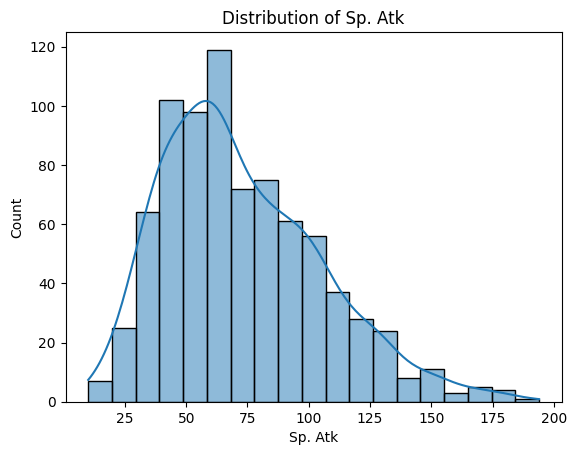

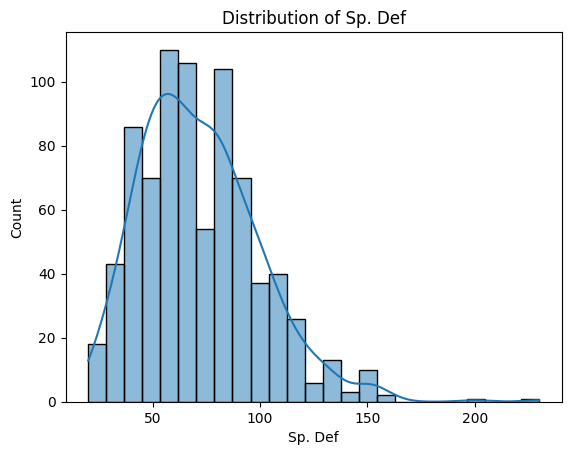

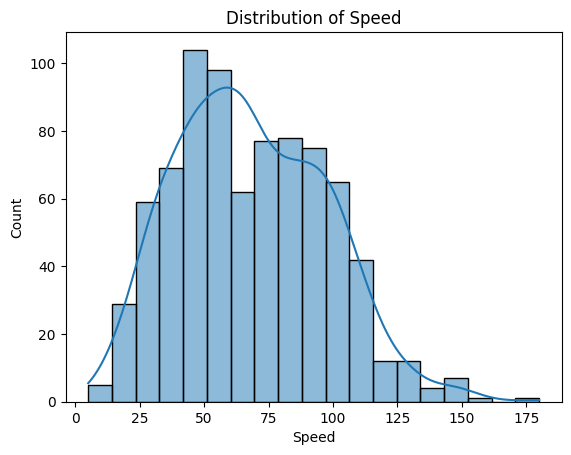

In [152]:
# Visualize the distribution of numerical columns
numerical_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

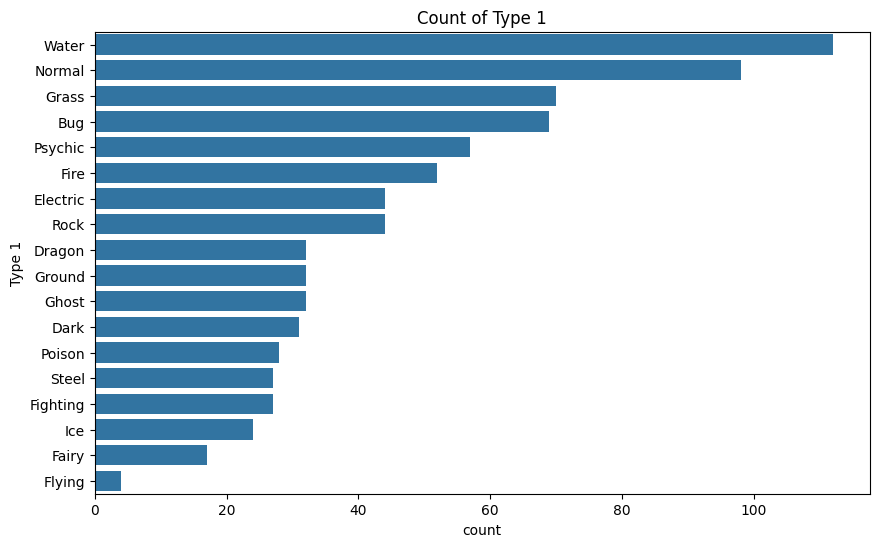

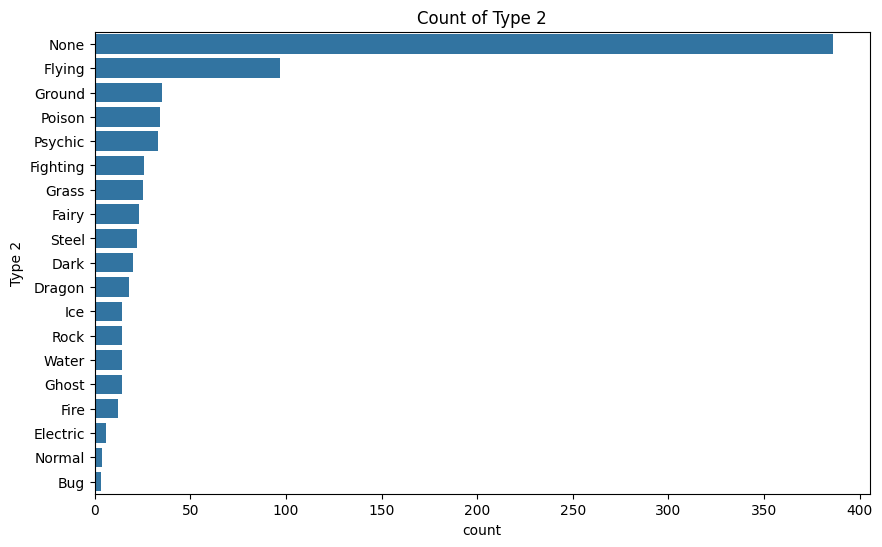

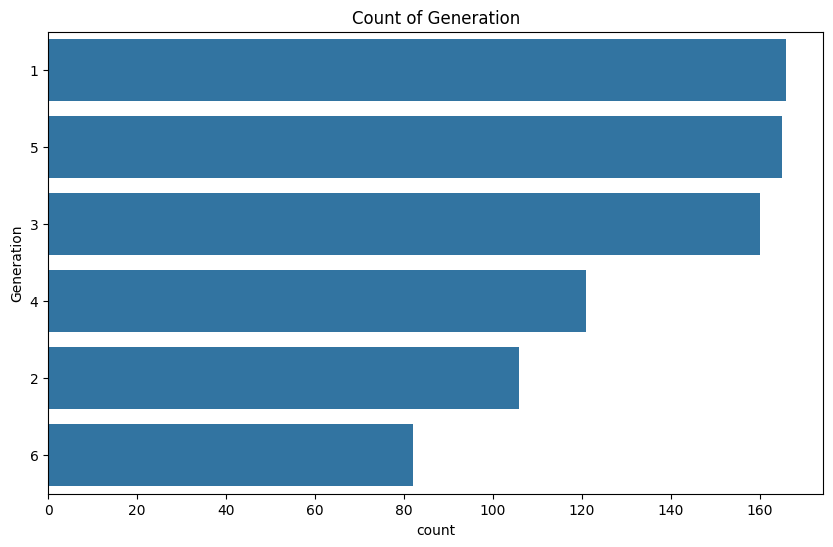

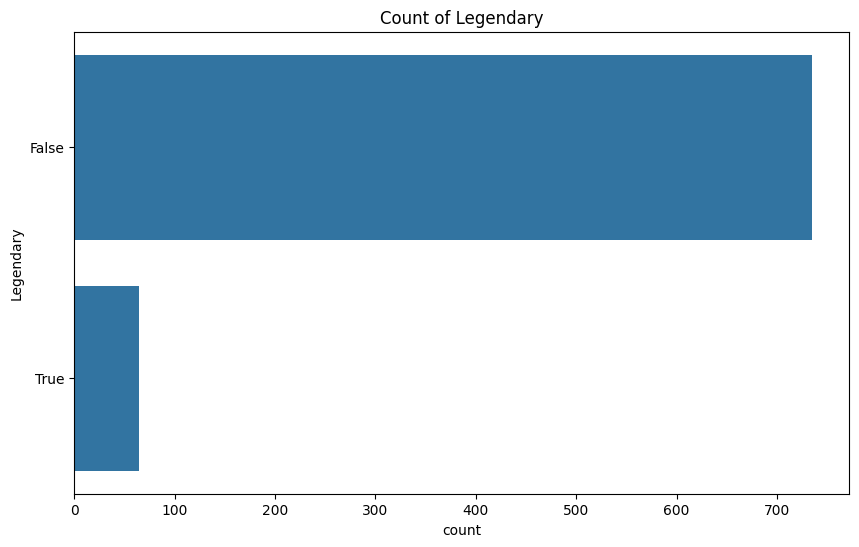

In [153]:
# Visualize the distribution of categorical columns
categorical_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

# Transform the dataset and save the new output as a csv labelled as Bisimbeko.csv

In [154]:
# Handle missing values in 'Type 2' by filling with 'None'
df['Type 2'].fillna('None', inplace=True)

In [155]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

In [156]:
# Remove rows with duplicate index
df = df.loc[~df.index.duplicated(keep='first')]

In [157]:
# Drop 'Legendary' column as it may not be useful for our analysis
# df = df.drop(columns=['Legendary'])

# Remove rows with names containing "Mega"
df = df[~df['Name'].str.contains('Mega')]

In [158]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [159]:
# Drop any remaining NaN values (if necessary)
df.dropna(inplace=True)

In [160]:
# Verify the dataset after transformation
print(df.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [161]:
# Save transformed dataset to a CSV file
transformed_filename = "Bisimbeko.csv"
df.to_csv(transformed_filename, index=False)
print(f"Transformed dataset saved as {transformed_filename}")

Transformed dataset saved as Bisimbeko.csv


# Which features statistically affect the variable "Type 2"?

In [162]:
# Approach 1

# Statistical analysis of 'Type 2'
print("\nFeature Importance for 'Type 2':")
correlations = df.corr(numeric_only=True)
print(correlations)


Feature Importance for 'Type 2':
                   #     Total        HP    Attack   Defense   Sp. Atk  \
#           1.000000  0.187760  0.116916  0.157340  0.139939  0.147445   
Total       0.187760  1.000000  0.636714  0.709648  0.602502  0.739063   
HP          0.116916  0.636714  1.000000  0.430887  0.230780  0.370169   
Attack      0.157340  0.709648  0.430887  1.000000  0.411698  0.377493   
Defense     0.139939  0.602502  0.230780  0.411698  1.000000  0.204843   
Sp. Atk     0.147445  0.739063  0.370169  0.377493  0.204843  1.000000   
Sp. Def     0.125762  0.704408  0.372394  0.206532  0.498390  0.491795   
Speed       0.050577  0.562354  0.173194  0.350505  0.009001  0.458108   
Generation  0.983035  0.113220  0.078725  0.107319  0.084410  0.090205   
Legendary   0.155708  0.526838  0.276663  0.362689  0.274959  0.460059   

             Sp. Def     Speed  Generation  Legendary  
#           0.125762  0.050577    0.983035   0.155708  
Total       0.704408  0.562354    0.113

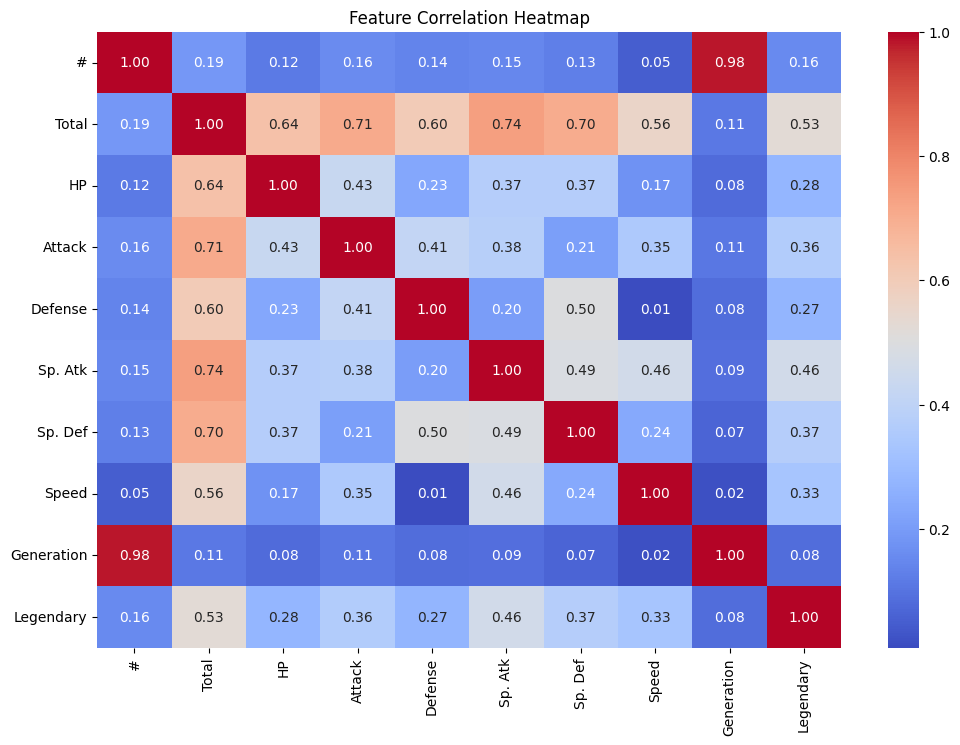

In [163]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Chi-squared test for Type 1 and Type 2:
Chi2 statistic: 814.6302862174649, p-value: 7.922576003897284e-48
There is a statistically significant association between Type 1 and Type 2.


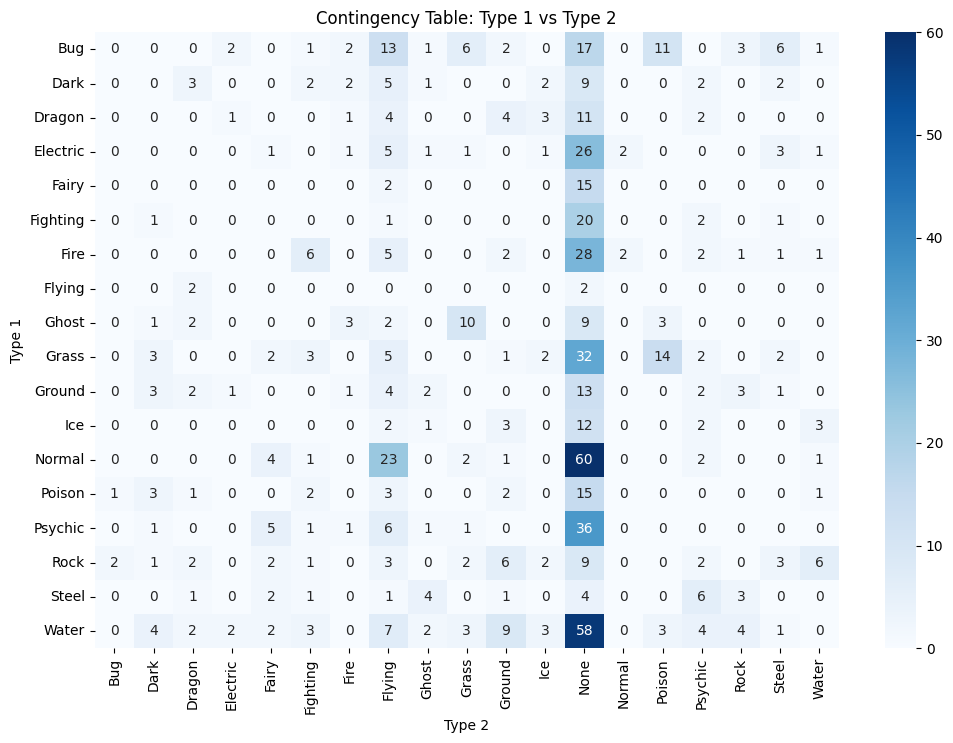


Chi-squared test for Generation and Type 2:
Chi2 statistic: 242.0350415362692, p-value: 7.188741726689048e-16
There is a statistically significant association between Generation and Type 2.


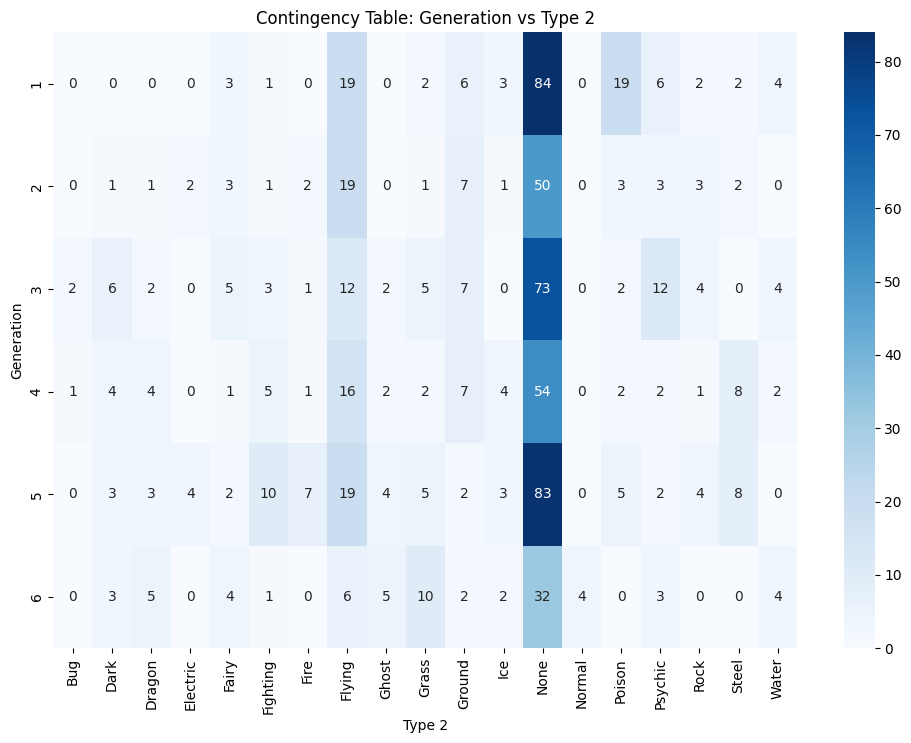


Chi-squared test for Legendary and Type 2:
Chi2 statistic: 32.020898293394566, p-value: 0.021862321403248973
There is a statistically significant association between Legendary and Type 2.


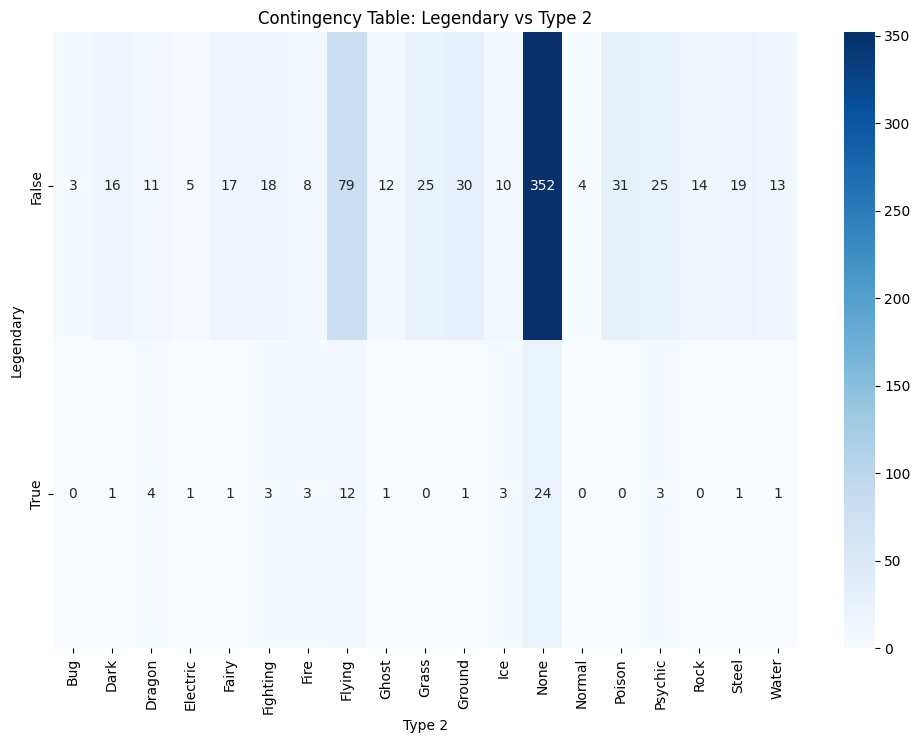

In [164]:
# Perform chi-squared test for categorical features
categorical_features = ['Type 1', 'Generation', 'Legendary']
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Type 2'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {feature} and Type 2:")
    print(f"Chi2 statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"There is a statistically significant association between {feature} and Type 2.")
        plt.figure(figsize=(12, 8))
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Contingency Table: {feature} vs Type 2')
        plt.show()
    else:
        print(f"There is no statistically significant association between {feature} and Type 2.")


In [165]:
# Approach 2

# Convert categorical variable "Type 2" into dummy variables
type2_dummies = pd.get_dummies(df['Type 2'], prefix='Type2', drop_first=True)

In [166]:
# Concatenate the dummy variables with the original dataframe
analysis_df = pd.concat([df, type2_dummies], axis=1)

In [167]:
# Define the independent variables (features) and dependent variable (Type 2)

print(df.columns)  # Check column names
df.columns = df.columns.str.strip()


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [168]:
# Drop non-numeric columns
df = df.drop(columns=["#", "Name", "Type 1", "Type 2"])

In [169]:
# Convert 'Legendary' to numeric (True = 1, False = 0)
df["Legendary"] = df["Legendary"].astype(int)

In [170]:
# Ensure y is numeric and binary (modify based on your dataset)
# Define X (features) and y (target)
X = df.drop(columns=["Legendary"])  # Features
y = df["Legendary"]  # Target variable (binary)

In [171]:
# Add constant term for logistic regression
X = sm.add_constant(X) # Adds a constant term to the predictor

In [172]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit() 

         Current function value: 0.054640
         Iterations: 35


In [173]:
# Print the summary of the logistic regression
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  751
Model:                          Logit   Df Residuals:                      742
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                  0.8015
Time:                        12:55:52   Log-Likelihood:                -41.035
converged:                      False   LL-Null:                       -206.71
Covariance Type:            nonrobust   LLR p-value:                 8.646e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -48.0268      8.839     -5.434      0.000     -65.350     -30.703
Total          0.0705   2.95e+04   2.39e-06      1.000   -5.77e+04    5.77e+04
HP            -0.0584   2.95e+04  -1.98e-06      1.0

# Which features are statistically linked to the "Speed" of a player?

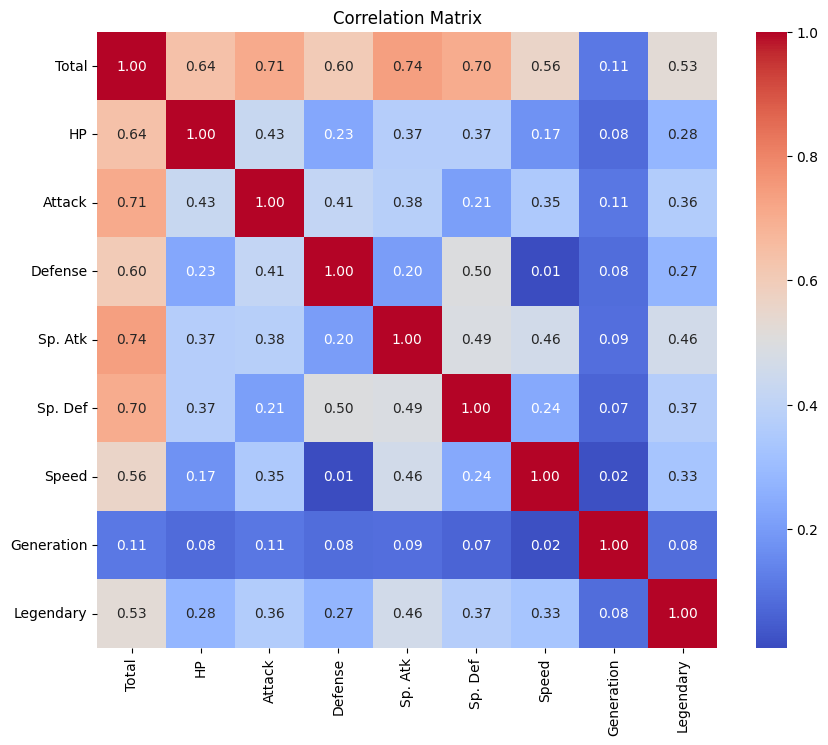

In [174]:
# Approach 1

# Correlation matrix to find features linked to Speed

# correlation_matrix = df.corr()
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [175]:
# Features with high correlations and Statistical analysis of 'Speed' 
print("\nFeature Importance for 'Speed':")
speed_correlation = correlations['Speed'].sort_values(ascending=False)
print(speed_correlation)


Feature Importance for 'Speed':
Speed         1.000000
Total         0.562354
Sp. Atk       0.458108
Attack        0.350505
Legendary     0.332077
Sp. Def       0.239074
HP            0.173194
#             0.050577
Generation    0.017314
Defense       0.009001
Name: Speed, dtype: float64


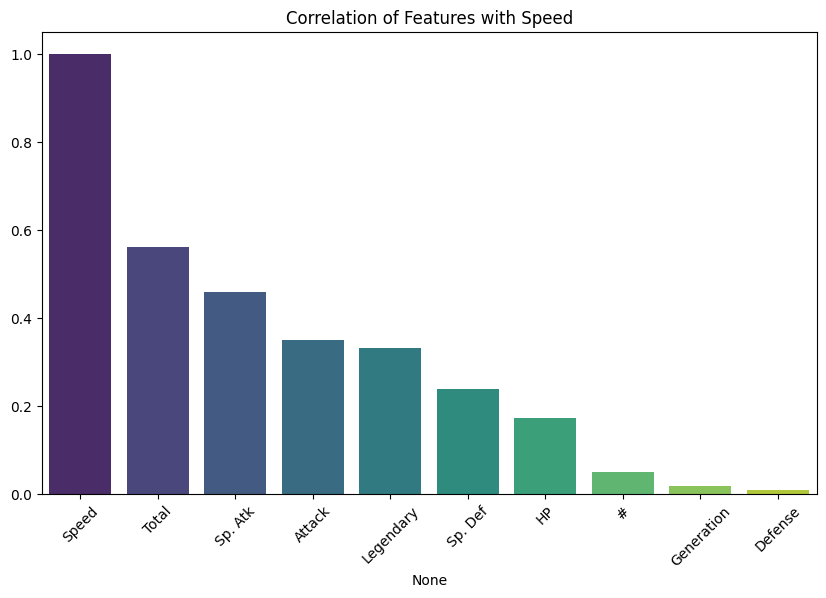

In [176]:
# Visualizing correlation of 'Speed'
plt.figure(figsize=(10, 6))
sns.barplot(x=speed_correlation.index, y=speed_correlation.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Correlation of Features with Speed")
plt.show()


ANOVA for Total and Speed:
F-statistic: 3.087012645448734, p-value: 1.735993430362733e-24
There is a statistically significant association between Total and Speed.


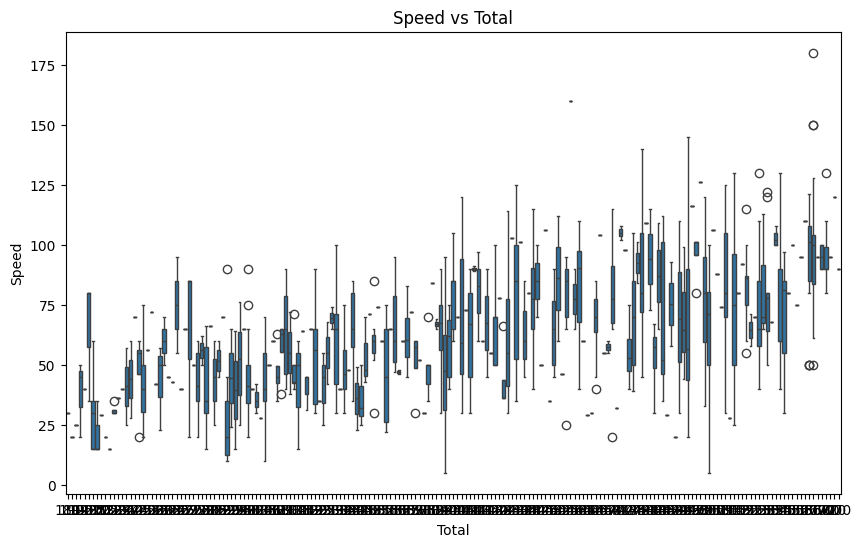


ANOVA for HP and Speed:
F-statistic: 1.9147491275091237, p-value: 3.0083414595355914e-06
There is a statistically significant association between HP and Speed.


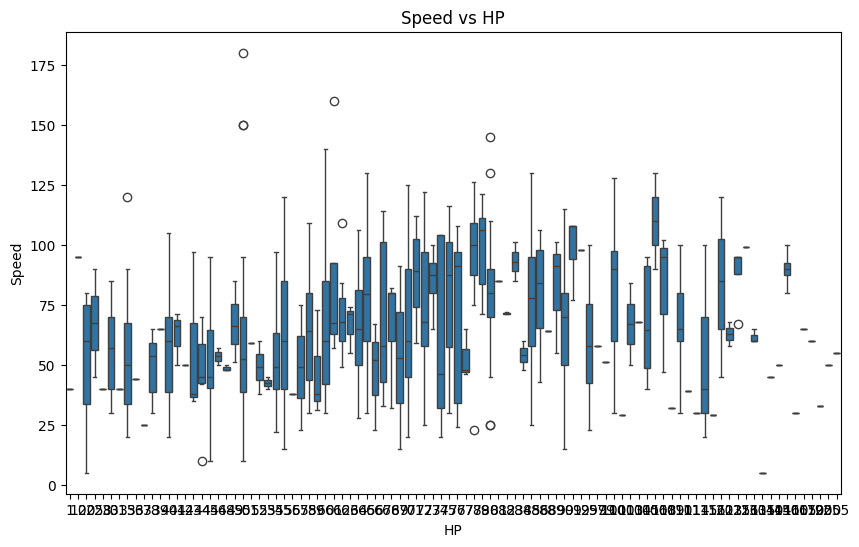


ANOVA for Attack and Speed:
F-statistic: 1.9606853038984926, p-value: 4.630645050780198e-07
There is a statistically significant association between Attack and Speed.


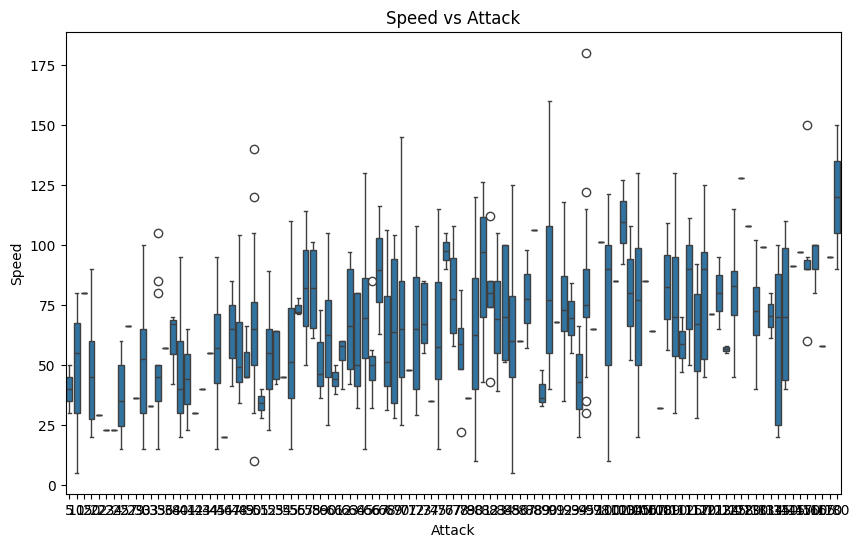


ANOVA for Defense and Speed:
F-statistic: 1.5608720908736569, p-value: 0.0010011350199899708
There is a statistically significant association between Defense and Speed.


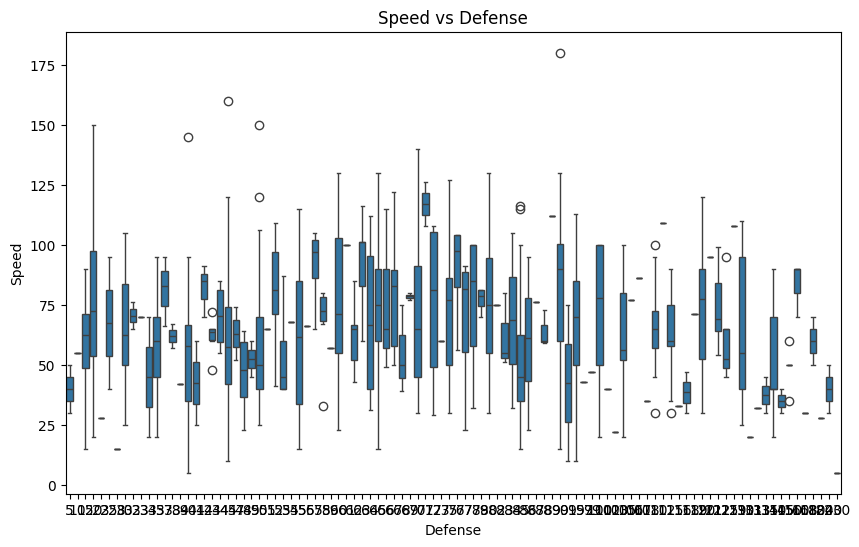


ANOVA for Sp. Atk and Speed:
F-statistic: 3.171001765850053, p-value: 4.730967569606074e-18
There is a statistically significant association between Sp. Atk and Speed.


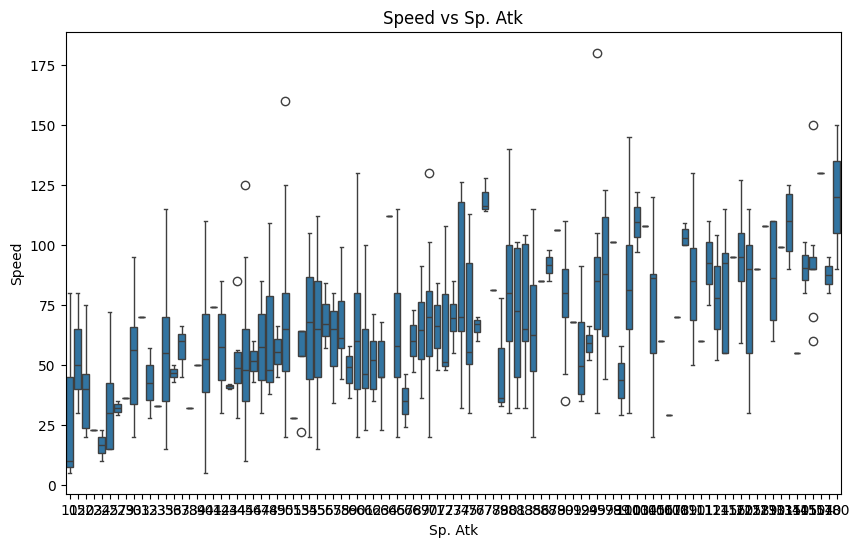


ANOVA for Sp. Def and Speed:
F-statistic: 2.4008399499312665, p-value: 3.3184697428737663e-10
There is a statistically significant association between Sp. Def and Speed.


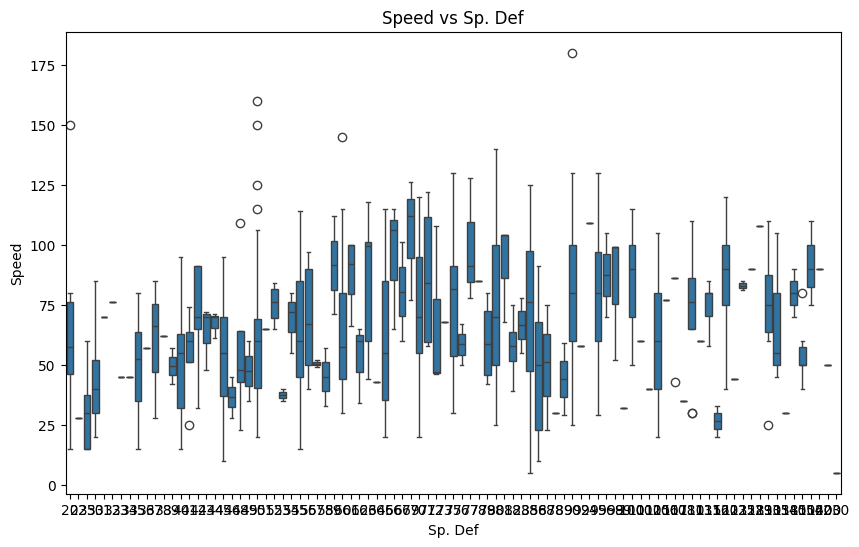

In [177]:
# Approach 2 

# Perform ANOVA for numerical features
numerical_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
for feature in numerical_features:
    groups = []
    for value in df[feature].unique():
        groups.append(df['Speed'][df[feature] == value].values)
    f_statistic, p_value = f_oneway(*groups)
    print(f"\nANOVA for {feature} and Speed:")
    print(f"F-statistic: {f_statistic}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"There is a statistically significant association between {feature} and Speed.")
        # Visualizing the relationship with boxplots
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[feature], y=df['Speed'])
        plt.title(f'Speed vs {feature}')
        plt.show()
    else:
        print(f"There is no statistically significant association between {feature} and Speed.")


# Generate two different unsupervised machine learning models that can be used to group the variable "Type 1"


In [178]:
# Approach 1

# Unsupervised Learning for 'Type 1'
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [179]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [180]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

In [181]:
# Save K-Means model
joblib.dump(kmeans, "kmeans_model.joblib")
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))
print("K-Means model saved as joblib and pickle.")

K-Means model saved as joblib and pickle.


In [182]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
linkage_matrix = linkage(X_pca, method='ward')
df['Hierarchical Cluster'] = fcluster(linkage_matrix, 5, criterion='maxclust')

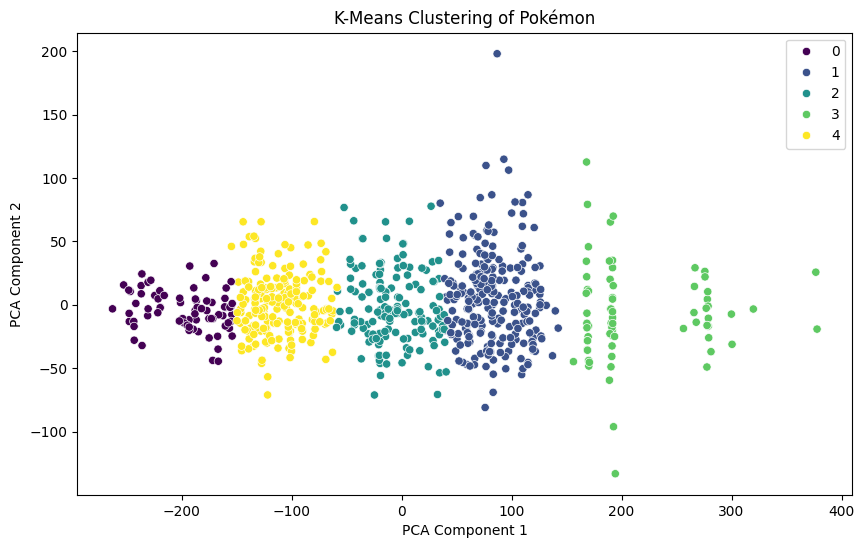

In [183]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering of Pokémon")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

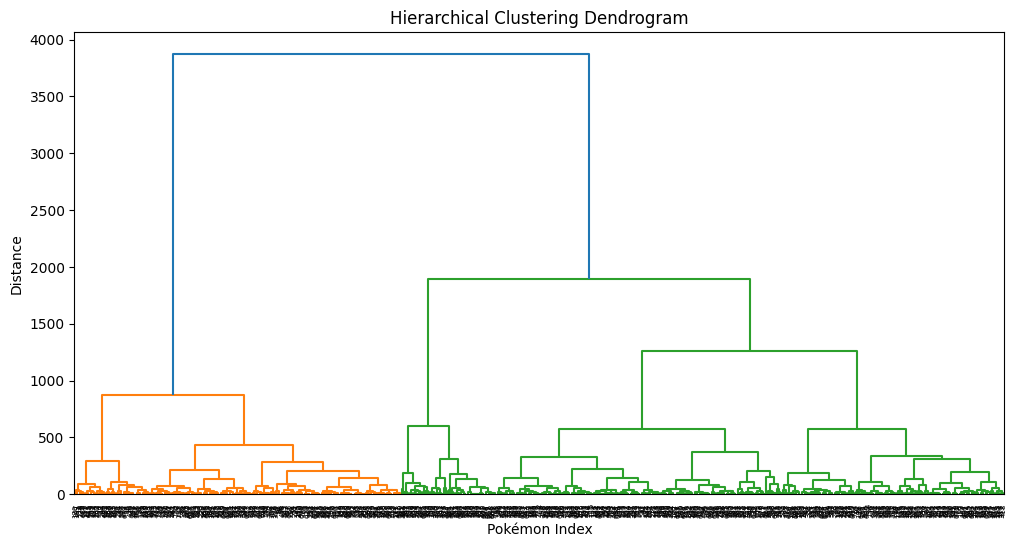

In [184]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Pokémon Index")
plt.ylabel("Distance")
plt.show()

In [185]:
# Appraoch 2 
df = pd.read_csv("Pokemon.csv") 

# Prepare the data for clustering
le = LabelEncoder()
df_cluster = df[['Type 1']].copy()
df_cluster['Type 1 Encoded'] = le.fit_transform(df_cluster['Type 1'])
X = df_cluster[['Type 1 Encoded']]

In [186]:
# KMeans clustering
kmeans = KMeans(n_clusters=len(df['Type 1'].unique()), random_state=42)
kmeans_labels = kmeans.fit_predict(X)
print("\nKMeans cluster labels:\n", kmeans_labels)


KMeans cluster labels:
 [ 4  4  4  4 10 10 10 10 10  9  9  9  9  8  8  8  8  8  8  8  0  0  0  0
  0  0  0  0 14 14  7  7 12 12 14 14 14 14 14 14 17 17 10 10  0  0 14 14
  4  4  4  8  8  8  8 12 12  0  0  9  9 15 15 10 10  9  9  9  6  6  6  6
 15 15 15  4  4  4  9  9 11 11 11 10 10  9  9  9  7  7  0  0  0  9  9 14
 14  9  9 13 13 13 13 11  6  6  9  9  7  7  4  4 12 12 15 15  0 14 14 12
 12  0  4  0  0  9  9  9  9  9  9  6  8 16  7 10  8  8  0  9  9  9  9  0
  0  9  7 10  0 11 11 11 11 11 11  0 16  7 10  1  1  1  6  6  6  6  4  4
  4 10 10 10  9  9  9  0  0  0  0  8  8  8  8 14  9  9  7 17  0 17 17  6
  6  7  7  7  7  4  9  9 11  9  4  4  4  0  4  4  8  9  9  6  5  5  9 13
  6  6  0  8  8  0 12  2  2 17 17  9  8  8  8  8  8  5  0  0 10 10 16 16
  9  9  9 16  9  2  5  5  5  9 12 12  0  0  0 15 15 16  7 10  0  0  7 10
  9 11 11 11 11  6 10  6  4  4  4  4 10 10 10 10  9  9  9  9  5  5  0  0
  8  8  8  8  8  9  9  9  4  4  4  0  0  9  9  6  6  6  6  8  8  4  4  0
  0  0  8  8  8  0  0  0 1

In [187]:
# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=len(df['Type 1'].unique()))
agg_labels = agg_cluster.fit_predict(X)
print("\nAgglomerative cluster labels:\n", agg_labels)


Agglomerative cluster labels:
 [11 11 11 11  4  4  4  4  4  0  0  0  0 13 13 13 13 13 13 13 17 17 17 17
 17 17 17 17 12 12  9  9 15 15 12 12 12 12 12 12  3  3  4  4 17 17 12 12
 11 11 11 13 13 13 13 15 15 17 17  0  0  5  5  4  4  0  0  0 10 10 10 10
  5  5  5 11 11 11  0  0  2  2  2  4  4  0  0  0  9  9 17 17 17  0  0 12
 12  0  0  8  8  8  8  2 10 10  0  0  9  9 11 11 15 15  5  5 17 12 12 15
 15 17 11 17 17  0  0  0  0  0  0 10 13 16  9  4 13 13 17  0  0  0  0 17
 17  0  9  4 17  2  2  2  2  2  2 17 16  9  4  7  7  7 10 10 10 10 11 11
 11  4  4  4  0  0  0 17 17 17 17 13 13 13 13 12  0  0  9  3 17  3  3 10
 10  9  9  9  9 11  0  0  2  0 11 11 11 17 11 11 13  0  0 10  6  6  0  8
 10 10 17 13 13 17 15  1  1  3  3  0 13 13 13 13 13  6 17 17  4  4 16 16
  0  0  0 16  0  1  6  6  6  0 15 15 17 17 17  5  5 16  9  4 17 17  9  4
  0  2  2  2  2 10  4 10 11 11 11 11  4  4  4  4  0  0  0  0  6  6 17 17
 13 13 13 13 13  0  0  0 11 11 11 17 17  0  0 10 10 10 10 13 13 11 11 17
 17 17 13 13 13 17 

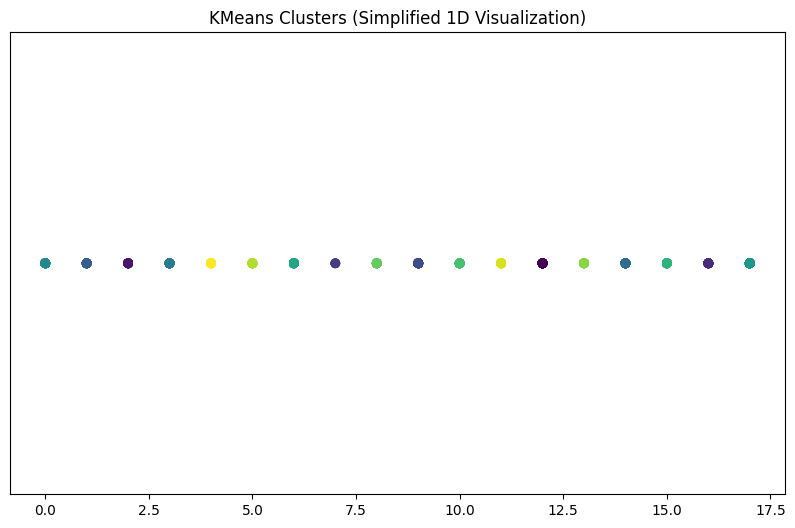

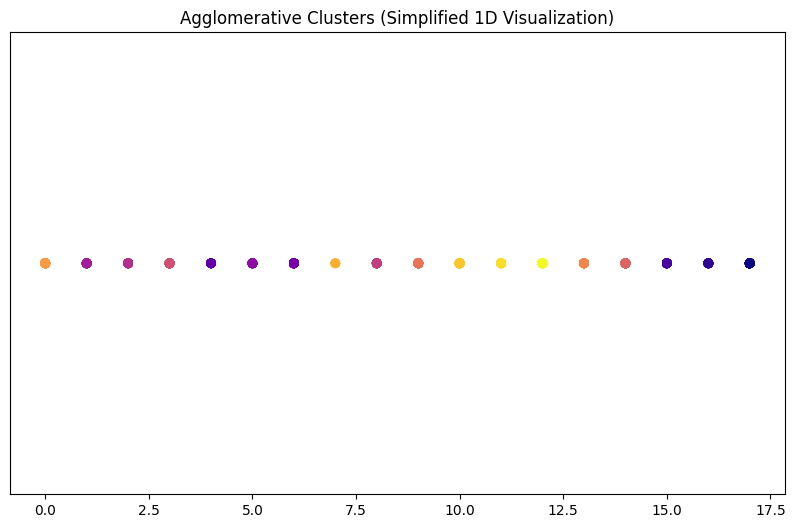

In [188]:
# Visualizing the clusters (simplified since it's 1D)
plt.figure(figsize=(10, 6))
plt.scatter(X, [0] * len(X), c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters (Simplified 1D Visualization)')
plt.yticks([])  # Remove y-axis ticks
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, [0] * len(X), c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clusters (Simplified 1D Visualization)')
plt.yticks([])
plt.show()

In [189]:
# Approach 3 

# Prepare data for clustering
features_for_clustering = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

In [190]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
df['KMeans_Cluster'] = kmeans.labels_

In [191]:
# Save the KMeans model as a joblib file
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [192]:
# Save the KMeans model as a pickle file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [193]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


# Save the above generated models as joblib files.

In [194]:
# Save the PCA model as a joblib file
joblib.dump(pca, 'pca_model.joblib')

joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(agg_cluster, 'agg_cluster_model.joblib')

# Save Hierarchical Clustering model
joblib.dump(linkage_matrix, "hierarchical_model.joblib")
pickle.dump(linkage_matrix, open("hierarchical_model.pkl", "wb"))
print("Hierarchical Clustering model saved as joblib and pickle.")

# Save the above generated models as pickle files.
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('agg_cluster_model.pkl', 'wb') as f:
    pickle.dump(agg_cluster, f)

print("\nModels saved as joblib and pickle files.")

Hierarchical Clustering model saved as joblib and pickle.

Models saved as joblib and pickle files.


In [195]:
# Display the first few rows of the updated dataframe
print(df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  KMeans_Cluster      PCA1  \
0       65       65     45           1      False               0 -1.840088   
1       80       80     60           1      False               1 -0.443543   
2      100      100     80           1      False               1  1.480309   
3      122      120     80           1      False               2  3.060557   
4       60       50     65           1      False               0 -2.045946   

       PCA2  
0 -0.025494  
1 -0.050760  
2 -0.058428  
3  0.711939  
4 -0.71149

In [196]:
# Additional Analysis: Evaluate Clustering Performance
# Calculate silhouette score for KMeans
silhouette_kmeans = silhouette_score(scaled_features, df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")

Silhouette Score for KMeans: 0.2608929660985711


In [197]:
# Calculate silhouette score for Agglomerative Clustering
silhouette_agg = silhouette_score(scaled_features, agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agg}")

Silhouette Score for Agglomerative Clustering: -0.14793176292793664


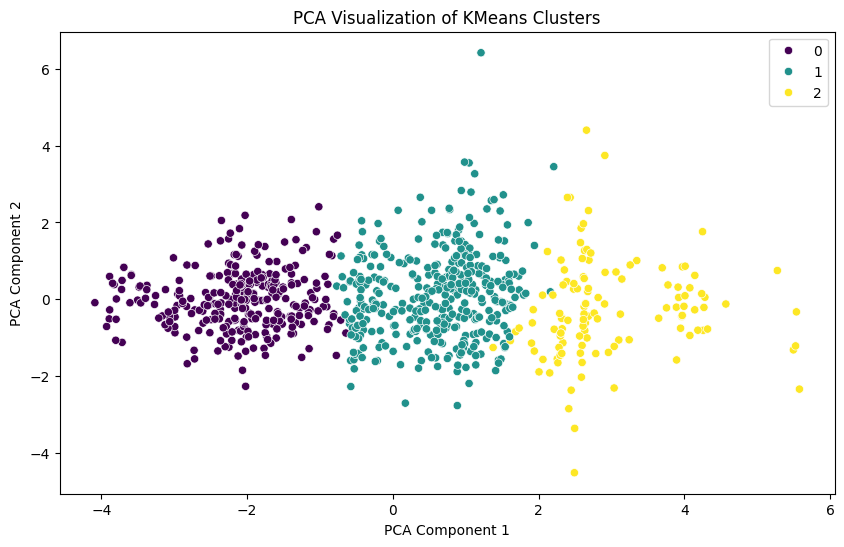

In [198]:
# Visualize the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title("PCA Visualization of KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [199]:
# Save the final dataframe with clusters
df.to_csv('Final_Pokemon_Analysis.csv', index=False)
print("Final dataframe saved as 'Final_Pokemon_Analysis.csv'.")

Final dataframe saved as 'Final_Pokemon_Analysis.csv'.
